**Задание**: Показать на эксперименте, что верхняя оценка на вероятность коллизии композиционного хеша для строк выполняется O(1/m + L/p). Подробнее в материалах лекции.

m - количество элементов в хэш-таблице. L - длина большей из двух строк. p - big prime number.

Построить графики зависимости FPR (false positive rate) от длинны строк L и простого модуля p.  
Эксперименты провести для L = np.linspace(10, 100, 11) и 10-ти простых чисел p из интервала (100, 1000).  
Для каждой точки выполнить 10 экспериментов, на графике отобразить стандартное отклонение оценки в каждой точке.

Немного повторения из лекции:  
Family of hash functions $H= \{\; h: X \rightarrow [0, m-1] \; \}$

Probability of collision for 2 strings with $L = max(|S_1|, |S_2|)$  
$Pr[h(S_1) = h(S_2) \; | \; s1 \neq s2] \leq \frac 1 m + \frac L p $

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import string
%matplotlib inline

In [2]:
# для каждой комбинации из точек в L и в P провести 10 экспериментов и посчитать стандартное отклонение
L = np.linspace(10, 100, 11)
P = np.ndarray((10,), buffer=np.array([151, 293, 383, 449, 503, 617, 743, 797, 881, 929]), dtype=int)
print(L)

[ 10.  19.  28.  37.  46.  55.  64.  73.  82.  91. 100.]


In [63]:
# generate strings with lengths from L

def generate_str(length, seed):
    random.seed(seed)  # ставим seed, чтобы в разных экспериментах были разные строки
    strings_add = []
    while len(strings_add) < 1000:  # генерируем 1000 строк в каждом эксперименте
        strings_add.append(''.join(random.choices(string.ascii_uppercase + string.ascii_lowercase, k=length)))
        strings_add = list(set(strings_add))
    return strings_add

len(generate_str(3, 5))

1000

In [17]:
def add_check_collision(s, p, table):
    h = hash_string(s, p)
    if h not in table:
        table[h] = s
        return False
    else:
        return True

def hash_string(s, p):
    h = 0
    # a = random.randint(1, len(s))
    for i, st in enumerate(s):
        h += ord(st) * (i + 1)
    return h % p

def check(s, p, hash_table):
    h = hash_string(s, p)
    if h in hash_table:
        return True
    else:
        return False

In [51]:
def experiment(length, p, seed):
    hash_table = {}
    collision = 0
    strings = generate_str(int(length), seed)  # 1000 strings
    for item in strings:
        h = hash_string(item, p)
        if h not in hash_table:
            hash_table[h] = item
        else:
            hash_table[h] = item
            collision += 1
    fpr = (2 * collision) / (1000 *  (1000-1))
    return fpr, len(hash_table)

In [52]:
# зависимост FPR от длины строки
means = []
stds = []
upper_bounds = []
for length in L:
    p = 881  # зафиксируем значение p
    k = 1
    fp_rates, upper = [], []
    seed = [1212, 15, 17, 300, 200, 551, 24, 412, 198, 7008, 693]
    while k <= 10:
        fp_rate, m = experiment(length, p, seed[k])
        fp_rates.append(fp_rate)
        upper_bound = 1/m + length/p
        upper.append(upper_bound)
        k += 1
    stds.append(np.std(fp_rates))
    means.append(np.mean(fp_rates))
    upper_bounds.append(np.mean(upper))
print(upper_bounds)

[0.013015827922224919, 0.023236078924795824, 0.033442528969539795, 0.04367524069481569, 0.05389327022668226, 0.06410010607992303, 0.07431294242056694, 0.08455243412044783, 0.09474233331869232, 0.10497342499749576, 0.11519956187323624]


In [57]:
# Check if верхняя оценка на вероятность коллизии композиционного хеша для строк выполняется O(1/m + L/p)
for i, el in enumerate(upper_bounds):
    if el < means[i]:
        print(False)

Значит, на всех 11 значениях длины строки выполняется.

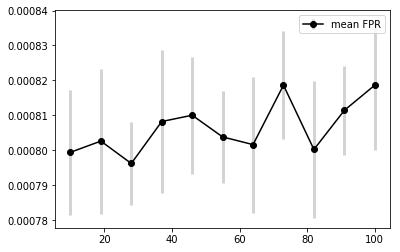

In [58]:
# место для графиков
plt.errorbar(L, means, stds, fmt='-o', color='black', ecolor='lightgray', elinewidth=3, label='mean FPR')
plt.legend()
plt.show()

Количество коллизий растет при увеличении длины строки и этот рост не быстрее линейного.

In [59]:
# зависимост FPR от p
means = []
stds = []
upper_bounds = []
for p in P:
    length = 10  # зафиксируем значение length
    k = 1
    fp_rates, upper = [], []
    seed = [1212, 15, 17, 300, 200, 551, 24, 412, 198, 7008, 693]
    while k <= 10:
        fp_rate, m = experiment(length, p, seed[k])
        fp_rates.append(fp_rate)
        upper_bound = 1/m + length/p
        upper.append(upper_bound)
        k += 1
    stds.append(np.std(fp_rates))
    means.append(np.mean(fp_rates))
    upper_bounds.append(np.mean(upper))
print(upper_bounds)

[0.07285651214128037, 0.037661210430353566, 0.028904354781963782, 0.02477058262530268, 0.022180396407140316, 0.01821934753185111, 0.015275487022911377, 0.014289231028063485, 0.013015827922224919, 0.012393539774731916]


In [61]:
print(stds)

[8.008008008007772e-07, 6.381332312516238e-06, 1.0572769510719413e-05, 1.375566237141293e-05, 9.907381807134052e-06, 1.0496678061195864e-05, 1.5066977154936368e-05, 1.557063411839902e-05, 1.7862749972928415e-05, 1.793887635183006e-05]


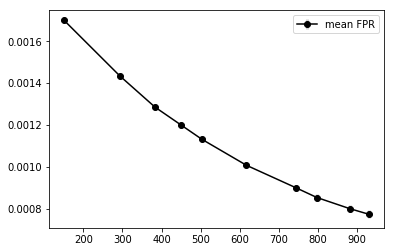

In [60]:
# место для графиков
plt.errorbar(P, means, stds, fmt='-o', color='black', ecolor='lightgray', elinewidth=3, label='mean FPR')
plt.legend()
plt.show()

FPR зависит от значения большого просто числа, используемого в хэш-функции. Чем больше p, тем меньше FPR (по гиперболе).

In [62]:
# Check if верхняя оценка на вероятность коллизии композиционного хеша для строк выполняется O(1/m + L/p)
for i, el in enumerate(upper_bounds):
    if el < means[i]:
        print(False)

Для всех значений большого простого числа выполняется O(1/m + L/p)